In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

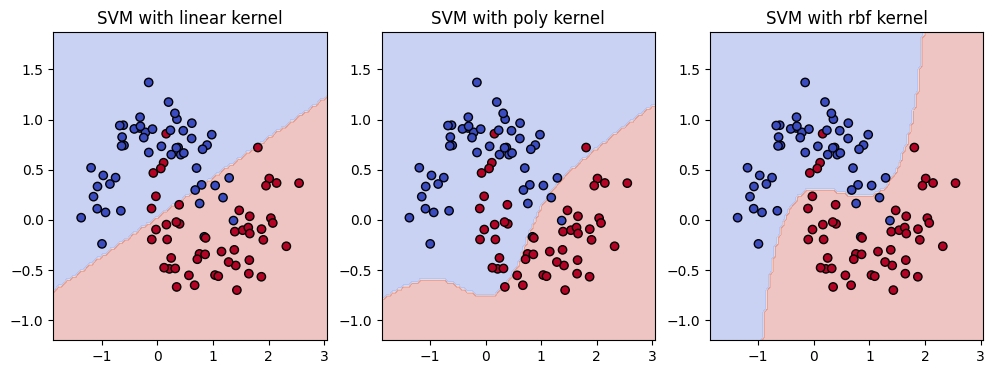

In [4]:
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=42)
kernels = ['linear', 'poly', 'rbf']
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel, degree=3, gamma='auto').fit(X_moons, y_moons)
    ax = axes[i]
    ax.set_title(f"SVM with {kernel} kernel")

    x_min, x_max = X_moons[ :, 0].min() - 0.5, X_moons[ :, 0].max() + 0.5
    y_min, y_max = X_moons[ :, 1].min() - 0.5, X_moons[ :, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, edgecolors='k', cmap=plt.cm.coolwarm)

plt.show()